In [15]:
import sys
import os
from pathlib import Path
here = Path.cwd()
sys.path.append(os.path.join(here, "../src/"))
sys.path.append(os.path.join(here, "../src/polykin"))
from polykin import Flory, Poisson

## Instantiate a distribution

The `distributions` module offers two types of theoretical distributions (`Flory` and `Poisson`) as well as one empirical (`LogNormal`) distribution. To instantiate a distribution object, we call the respective class constructor with the average degree of polymerization as first required argument and, optionally, the average molar-mass of the repeating units and the distribution name as additional arguments.  


In [16]:
p = Poisson(100)
f = Flory(120, M0=65, name='polymerX')

The key properties of a distribution can be displayed with the `print` command.

In [17]:
print(p)

name: Poisson
DPn:  100.0
DPw:  101.0
DPz:  101.0
PDI:  1.01
M0:   100.0
Mn:   10,000
Mw:   10,099
Mz:   10,197


In [18]:
print(f)

name: polymerX (Flory)
DPn:  120.0
DPw:  239.0
DPz:  239.0
PDI:  1.99
M0:   65.0
Mn:   7,800
Mw:   15,535
Mz:   23,302


The primary properties of the distribution can be reset, if derired.

In [19]:
p.DPn = 5
p.M0 = 123
p.name = 'polymerZ'
print(p)

name: polymerZ (Poisson)
DPn:  5.0
DPw:  5.8
DPz:  5.8
PDI:  1.16
M0:   123.0
Mn:   615
Mw:   713
Mz:   802


## Plot a distribution

The class method `plot()` to allows for a quick visualization of the corresponding _number_, _mass_ or _GPC_ probability density function (pdf). If no arguments are specified, the mass pdf is displayed.

<AxesSubplot: xlabel='Chain length', ylabel='Relative abundance'>

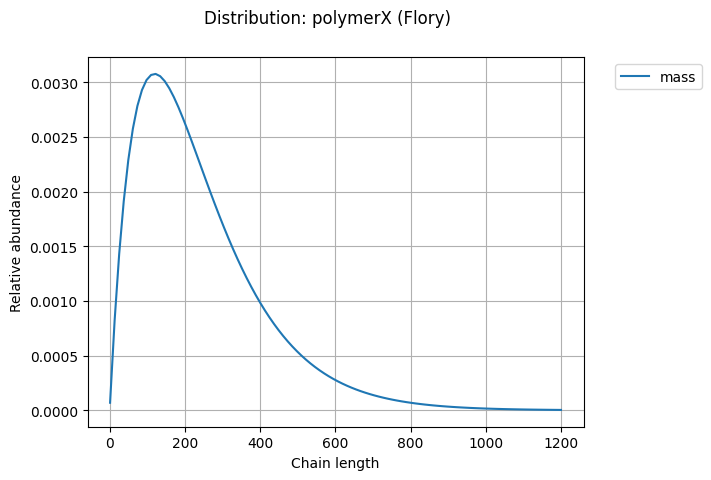

In [20]:
f.plot()

Many other types of plots can be generated. For example, a plot overlaying the number and mass pdf, with an x-axis based on molar mass rather than chain-length.

<AxesSubplot: xlabel='Molar mass', ylabel='Relative abundance'>

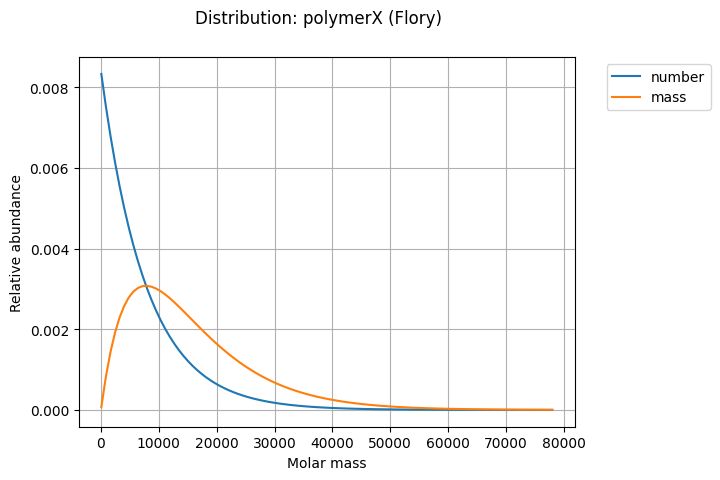

In [21]:
f.plot(['number','mass'], unit_size='molar_mass')

If we select a GPC-type plot, the x-axis scale is automatically switched to 'log'.  

<AxesSubplot: xlabel='Molar mass', ylabel='Relative abundance'>

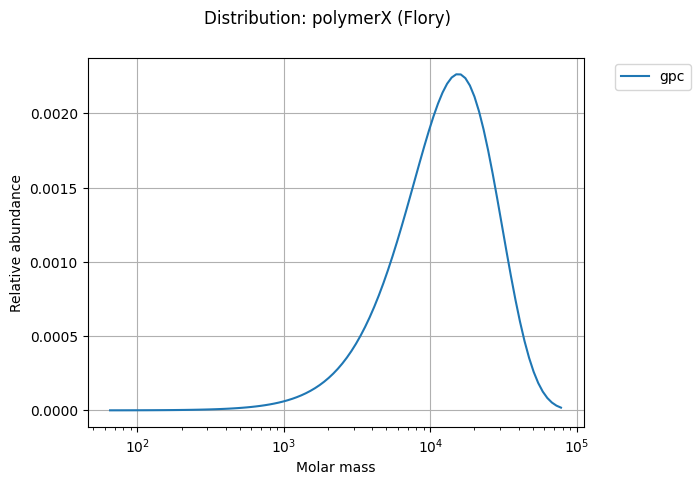

In [22]:
f.plot('gpc', unit_size='molar_mass')

## Probability values

Probability density function (pdf) as well as cumulative density function (cfd) values can be obtained for any chain-length by using the methods `pdf()` and `cdf()`, respectively.

In [23]:
# mass pdf for a single chain-length
f.pdf(120) 

0.0030784980298821907

In [24]:
# mass pdf for a list/array of chain-lengths
f.pdf([110, 120, 130]) 

array([0.00306827, 0.0030785 , 0.00306731])

In [25]:
# number pdf for a list/array of chain molar masses
p.pdf([600, 700, 800], dist='number', unit_size='molar_mass') #

array([0.19791364, 0.17101025, 0.13008108])

The pdf and cdf values are, of course, internally consistent, as illustrated by the example below.

In [30]:
x = [i for i in range(1,6)]
pdf = p.pdf(x, dist='number')
cdf = p.cdf(x[-1], dist='number')
print('sum(pdf):', sum(pdf))
print('cdf:     ', cdf)

sum(pdf): 0.6288369351798734
cdf:      0.6288369351798733


## Random chain samples